# Model Building

### Loading Requried Libraries

In [1]:
import pandas as pd 
import numpy as np

In [2]:
data=pd.read_excel('C:\\Users\\Vinu\\Downloads\\Voziq Hiring Challenge\\Data.xlsx', header=0,na_values='unknown')

In [3]:
data.head()

,ID,Col1,Col2,Col3,Col4,Col5,Col6,Target
0,1,88660,530,a,42.92,39.95,a,0
1,2,6490,163,a,40.96,44.99,d,1
2,3,47700,827,d,50.97,54.99,"a,b",0
3,4,25970,-820,d,34.44,24.95,"a,b,c",0
4,5,65660,-407,a,55.92,54.95,a,1


In [4]:
#Finding missing values column wise in data
data.isnull().sum()

ID           0
Col1         0
Col2         0
Col3         0
Col4         0
Col5      2030
Col6         0
Target       0
dtype: int64

In [5]:
## Checking the dtypes of the data
data.dtypes

ID          int64
Col1        int64
Col2        int64
Col3       object
Col4      float64
Col5      float64
Col6       object
Target      int64
dtype: object

In [6]:
#Finding No of Uniques levels and name of the Unique levels in each column 
def explore_data(data) :
      return pd.DataFrame({"No of Levels": data.apply(lambda x: str(x.nunique()),axis=0),
                          "Levels": data.apply(lambda x: str(x.unique()),axis=0)})

In [7]:
explore_data(data)

,No of Levels,Levels
ID,10000,[ 1 2 3 ... 9998 9999 10000]
Col1,10000,[88660 6490 47700 ... 28790 39920 6960]
Col2,3664,[ 530 163 827 ... 618 -1534 1545]
Col3,4,['a' 'd' 'b' 'c']
Col4,1915,[42.92 40.96 50.97 ... 40.24 35.41 53.39]
Col5,316,[3.995e+01 4.499e+01 5.499e+01 2.495e+01 5.495...
Col6,7,"['a' 'd' 'a,b' 'a,b,c' 'b,c' 'c,d' 'b,d']"
Target,2,[0 1]


In [8]:
#Finding value counts of the target variable
data.Target.value_counts()

0    8257
1    1743
Name: Target, dtype: int64

In [9]:
# Normalize can be set to True to print proportions instead of number
data['Target'].value_counts(normalize=True)

0    0.8257
1    0.1743
Name: Target, dtype: float64

By seeing the Target Variable counts we can say that we have a class imbalance in the data set

In [10]:
## Converting the requried variables into categorical 
for col in ('Col3','Col6','Target'):
    data[col] = data[col].astype('category')

In [11]:
data.dtypes

ID           int64
Col1         int64
Col2         int64
Col3      category
Col4       float64
Col5       float64
Col6      category
Target    category
dtype: object

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Vinu\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


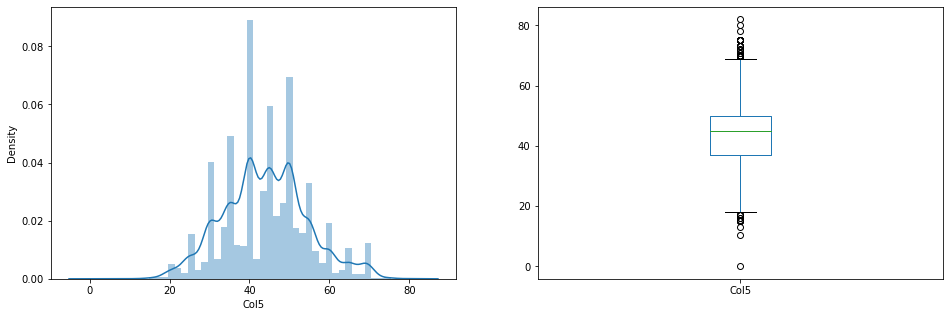

In [13]:
plt.figure(1) 
plt.subplot(121) 
df=data.dropna() 
sns.distplot(df['Col5']); 
plt.subplot(122) 
data['Col5'].plot.box(figsize=(16,5)) 
plt.show()

In [14]:
data.groupby(['Target'])['Col5'].mean()

Target
0    43.807920
1    44.760966
Name: Col5, dtype: float64

In [15]:
data['Col5'] = data['Col5'].fillna(data.groupby('Target')['Col5'].transform('mean'))

In [16]:
data.isnull().sum()

ID        0
Col1      0
Col2      0
Col3      0
Col4      0
Col5      0
Col6      0
Target    0
dtype: int64

In [17]:
##Converting categorical to numerical by Label encoding
cat_col=data.select_dtypes('category')

In [18]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
for i in cat_col:
    le1.fit(data[i])
    data[i] = le1.transform(data[i])

In [19]:
data.head()

,ID,Col1,Col2,Col3,Col4,Col5,Col6,Target
0,1,88660,530,0,42.92,39.95,0,0
1,2,6490,163,0,40.96,44.99,6,1
2,3,47700,827,3,50.97,54.99,1,0
3,4,25970,-820,3,34.44,24.95,2,0
4,5,65660,-407,0,55.92,54.95,0,1


### Train test Split 

In [20]:
X=data.drop('Target',axis=1)
Y=pd.DataFrame(data['Target'])

In [21]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

## Random Forest 

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
clf = RandomForestClassifier(n_estimators=10,max_depth=8)
clf.fit(X=X_train, y=y_train)

<ipython-input-24-6fa83ac1664a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X=X_train, y=y_train)


RandomForestClassifier(max_depth=8, n_estimators=10)

In [25]:
train_rf_pred = clf.predict(X_train)
test_rf_pred = clf.predict(X_test)

In [29]:
print(classification_report(y_test,test_rf_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1658
           1       0.89      0.16      0.27       342

    accuracy                           0.85      2000
   macro avg       0.87      0.58      0.60      2000
weighted avg       0.86      0.85      0.81      2000



In [30]:
print(confusion_matrix(y_test,test_rf_pred))

[[1651    7]
 [ 287   55]]


In [37]:
clf.feature_importances_

array([0.07258886, 0.07471738, 0.21603923, 0.01923666, 0.08497273,
       0.51057241, 0.02187273])

In [38]:
importances = clf.feature_importances_
indices = np.argsort(importances)
print(indices)

[3 6 0 1 4 2 5]


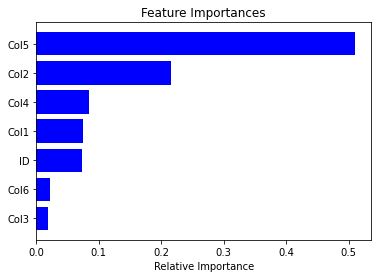

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
features = X_train.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We can say that 10000 unique ID's and COl1 will not give any iportance to model building. So we are building the next model without ID,Col1,Col6 and Col3

In [40]:
X=data.drop(['Target','Col6','Col3','Col1','ID'],axis=1)
Y=pd.DataFrame(data['Target'])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

## Decision Tree 

In [42]:
param_grid = {"criterion": ['entropy'],
             'min_samples_split': [5,10,20],
             'max_depth': [2,5,10,15,30],
             'max_leaf_nodes': [100,120,135,150]}

In [43]:
dt = tree.DecisionTreeClassifier()
dtree = GridSearchCV(dt, param_grid, cv = 5,n_jobs=-1)

In [44]:
dtree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [2, 5, 10, 15, 30],
                         'max_leaf_nodes': [100, 120, 135, 150],
                         'min_samples_split': [5, 10, 20]})

In [45]:
train_dtree_pred = dtree.predict(X_train)
test_dtree_pred = dtree.predict(X_test)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_dtree_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1658
           1       1.00      0.16      0.28       342

    accuracy                           0.86      2000
   macro avg       0.93      0.58      0.60      2000
weighted avg       0.88      0.86      0.81      2000



In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,test_dtree_pred))

[[1658    0]
 [ 286   56]]


In [51]:
pip install xgboost

ERROR: Could not install packages due to an EnvironmentError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Vinu\\Anaconda3\\Lib\\site-packages\\xgboost\\lib\\xgboost.dll'
Consider using the `--user` option or check the permissions.



  Using cached xgboost-1.3.1-py3-none-win_amd64.whl (95.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [52]:
from xgboost import XGBClassifier

In [53]:
xgb=XGBClassifier()

In [54]:
xg_param_grid = {'colsample_bytree': np.linspace(0.5, 0.9, 2),
                  'n_estimators':[100],
                  'max_depth': [10, 15]}

In [55]:
xgb_model=GridSearchCV(xgb, param_grid=xg_param_grid, cv=10)

In [56]:
xgb_model.fit(X_train,y_train)

C:\Users\Vinu\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Vinu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[17:29:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:29:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [57]:
train_xg_pred = xgb_model.predict(X_train)
test_xg_pred = xgb_model.predict(X_test)

In [58]:
print(classification_report(y_test,test_xg_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1658
           1       0.64      0.22      0.33       342

    accuracy                           0.85      2000
   macro avg       0.75      0.60      0.62      2000
weighted avg       0.82      0.85      0.81      2000



In [59]:
print(confusion_matrix(y_test,test_xg_pred))

[[1616   42]
 [ 267   75]]


In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
clf=GaussianNB()
clf = clf.fit(X_train, y_train)

C:\Users\Vinu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [62]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [63]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1658
           1       0.00      0.00      0.00       342

    accuracy                           0.83      2000
   macro avg       0.41      0.50      0.45      2000
weighted avg       0.69      0.83      0.75      2000



C:\Users\Vinu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
print(confusion_matrix(y_test,test_pred))

[[1658    0]
 [ 342    0]]


## My best model for this data set is DECISION TREE because when we see the confusion matrix of decision tree TRUE POSITIVE and TRUE NEGATIVE are high when compared to other Models. And FALSE POSTIVE RATE is less when compared to other models

In [65]:
## Decision Tree
dtree_prob=dtree.predict_proba(X_test)

In [66]:
dtree_prob

array([[0.87313433, 0.12686567],
       [0.83888889, 0.16111111],
       [0.77565632, 0.22434368],
       ...,
       [0.85950413, 0.14049587],
       [0.77565632, 0.22434368],
       [0.76353276, 0.23646724]])